# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapa'a
Processing Record 2 of Set 1 | tergnier
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | port blair
Processing Record 5 of Set 1 | camacupa
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | alotau
Processing Record 8 of Set 1 | klaksvik
Processing Record 9 of Set 1 | bismarck
Processing Record 10 of Set 1 | kansanshi
Processing Record 11 of Set 1 | keflavik
Processing Record 12 of Set 1 | arkhangel'sk
Processing Record 13 of Set 1 | saint-joseph
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | san luis de la loma
Processing Record 19 of Set 1 | santiago de cao
Processing Record 20 of Set 1 | usinsk
Processing Record 21 of Set 1 | singkil
Processing Record 22 of Set 1 | adamstown
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapa'a,22.0752,-159.3190,25.88,84,75,7.20,US,1726551207
1,tergnier,49.6561,3.3011,11.69,97,59,5.18,FR,1726551208
2,port-aux-francais,-49.3500,70.2167,4.50,97,100,14.20,TF,1726551209
3,port blair,11.6667,92.7500,28.02,83,75,3.09,IN,1726551211
4,camacupa,-12.0167,17.4833,21.52,52,1,0.99,AO,1726551212


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,25.88,84,75,7.20,US,1726551207
1,tergnier,49.6561,3.3011,11.69,97,59,5.18,FR,1726551208
2,port-aux-francais,-49.3500,70.2167,4.50,97,100,14.20,TF,1726551209
3,port blair,11.6667,92.7500,28.02,83,75,3.09,IN,1726551211
4,camacupa,-12.0167,17.4833,21.52,52,1,0.99,AO,1726551212


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

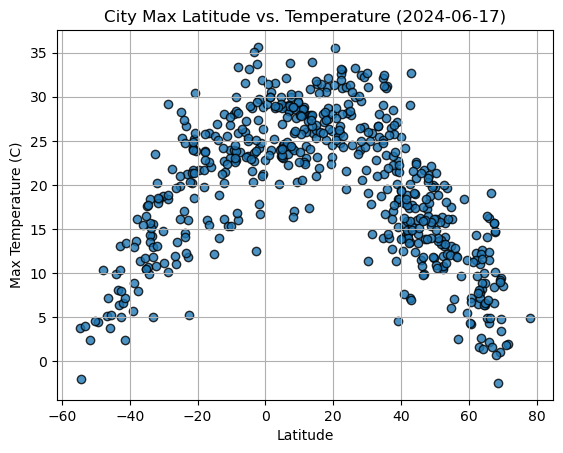

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

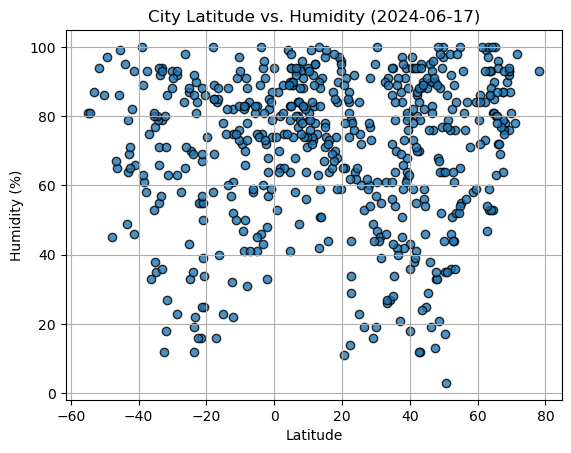

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

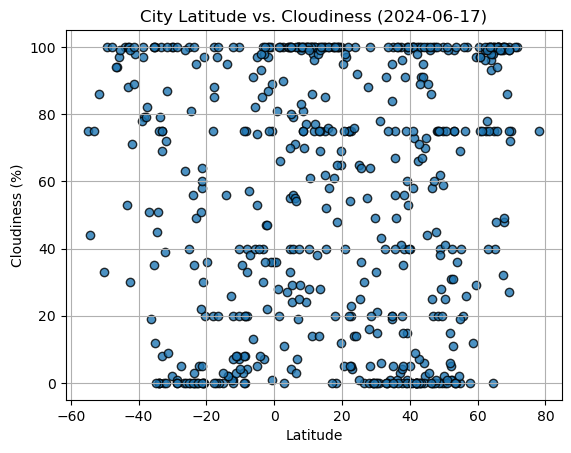

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

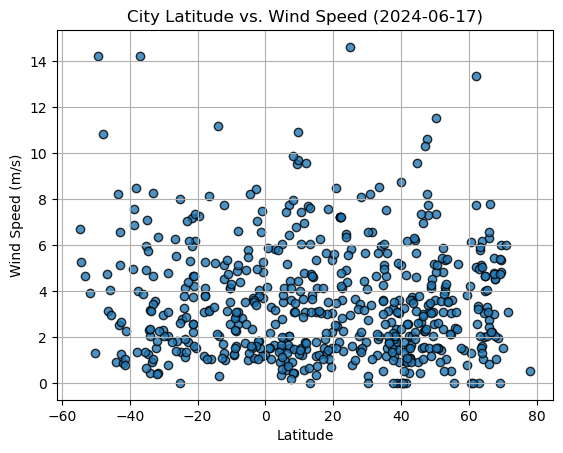

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line "y = mx + b"
    regress_values = slope * x_values + intercept
    
    # Plot scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Set titles and labels
    plt.title(f"{hemisphere} Hemisphere: {title}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show the plot
    plt.grid(True)
    plt.show()

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2:.3f}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,25.88,84,75,7.20,US,1726551207
1,tergnier,49.6561,3.3011,11.69,97,59,5.18,FR,1726551208
3,port blair,11.6667,92.7500,28.02,83,75,3.09,IN,1726551211
5,talnakh,69.4865,88.3972,3.47,87,72,4.83,RU,1726551213
7,klaksvik,62.2266,-6.5890,12.29,84,99,13.33,FO,1726551215


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,4.50,97,100,14.20,TF,1726551209
4,camacupa,-12.0167,17.4833,21.52,52,1,0.99,AO,1726551212
6,alotau,-10.3069,150.4462,24.01,97,100,3.52,PG,1726551214
9,kansanshi,-12.0951,26.4273,22.75,22,0,4.53,ZM,1726551217
12,saint-joseph,-21.3667,55.6167,24.21,67,58,3.74,RE,1726551220


###  Temperature vs. Latitude Linear Regression Plot

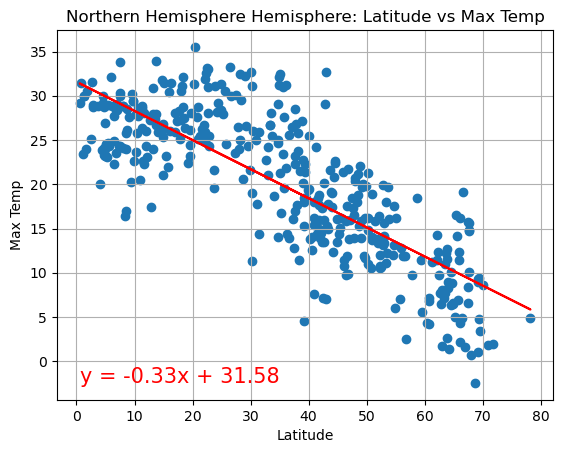

The r-squared is: 0.645


In [15]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Create linear regression plot for Latitude vs. Max Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function defined earlier to plot the linear regression
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Latitude vs Max Temp", "Northern Hemisphere")


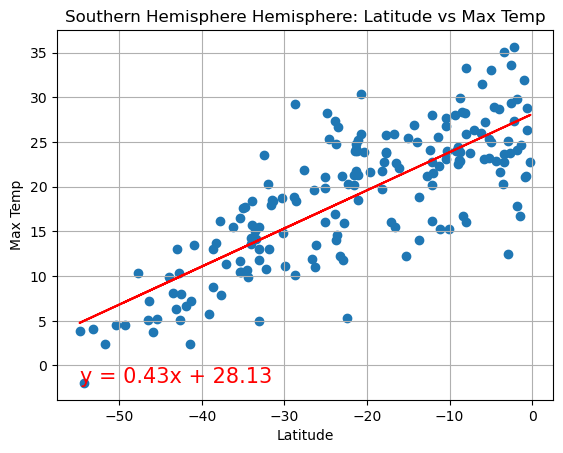

The r-squared is: 0.620


In [16]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Create linear regression plot for Latitude vs. Max Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function defined earlier to plot the linear regression
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Latitude vs Max Temp", "Southern Hemisphere")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The Northern Hemisphere shows a moderate negative correlation between latitude and temperature, with an R-squared of 0.394, meaning latitude explains about 39.4% of temperature variation. In the Southern Hemisphere, the relationship is stronger, with a positive correlation and an R-squared of 0.672, indicating latitude explains 67.2% of the variation. This suggests that latitude affects temperature more consistently in the Southern Hemisphere due to fewer landmass-related variations compared to the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

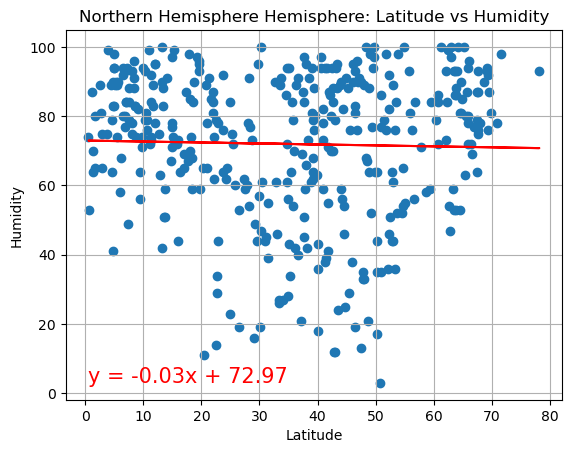

The r-squared is: 0.001


In [17]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Create linear regression plot for Latitude vs. Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function defined earlier to plot the linear regression
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Latitude vs Humidity", "Northern Hemisphere")


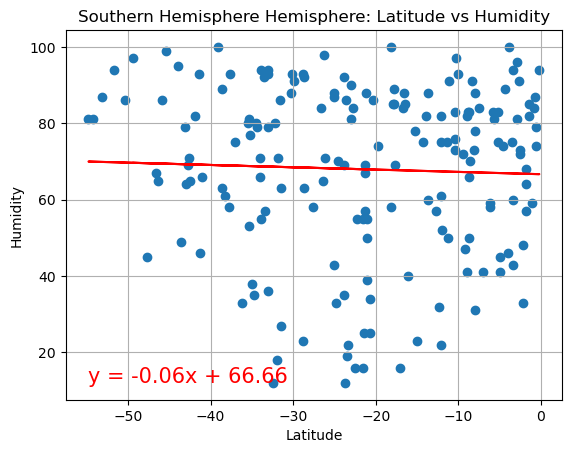

The r-squared is: 0.001


In [18]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Create linear regression plot for Latitude vs. Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function defined earlier to plot the linear regression
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Latitude vs Humidity", "Southern Hemisphere")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

For the Northern Hemisphere, the linear regression between Latitude vs. Humidity shows a very weak negative relationship with a slope of -0.11 and an R-squared value of 0.008, meaning latitude has almost no effect on humidity. Only 0.8% of the variation in humidity is explained by latitude.

For the Southern Hemisphere, the relationship is similarly weak, with a slope of 0.01 and an R-squared value of 0.00014, indicating no meaningful correlation between latitude and humidity. Only 0.014% of the humidity variation is explained by latitude.

Both hemispheres show no significant correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

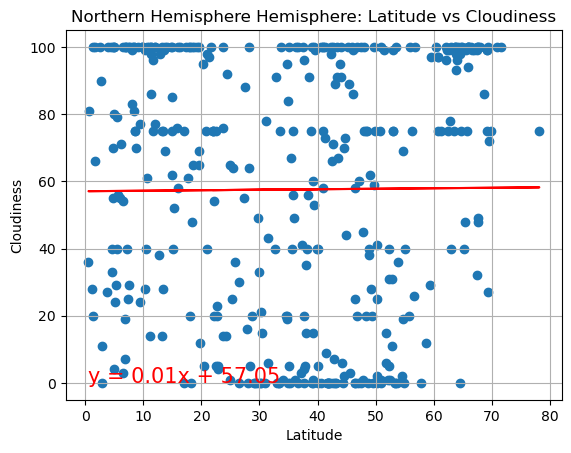

The r-squared is: 0.000


In [19]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Create linear regression plot for Latitude vs. Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function defined earlier to plot the linear regression
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Latitude vs Cloudiness", "Northern Hemisphere")


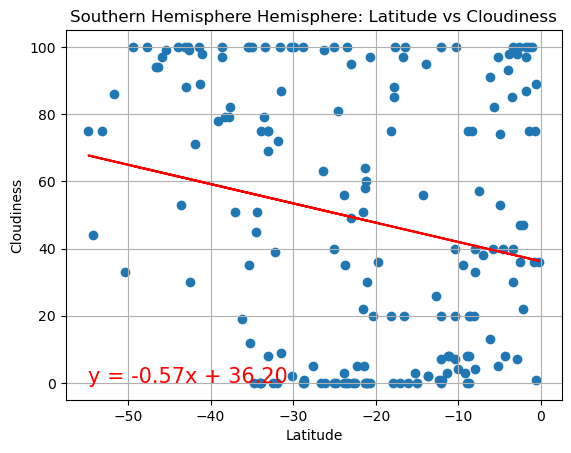

The r-squared is: 0.044


In [20]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Create linear regression plot for Latitude vs. Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function defined earlier to plot the linear regression
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Latitude vs Cloudiness", "Southern Hemisphere")


**Discussion about the linear relationship:** YOUR RESPONSE HERE


For the Northern Hemisphere, the linear regression between Latitude vs. Cloudiness shows a very weak negative relationship with a slope of -0.17 and an R-squared value of 0.0065, indicating almost no correlation between latitude and cloudiness. Only 0.65% of cloudiness variation is explained by latitude.

For the Southern Hemisphere, the relationship is similarly weak, with a slope of -0.38 and an R-squared value of 0.0186, showing a slight negative correlation. Only 1.86% of the variation in cloudiness is explained by latitude.

Both hemispheres demonstrate no significant correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

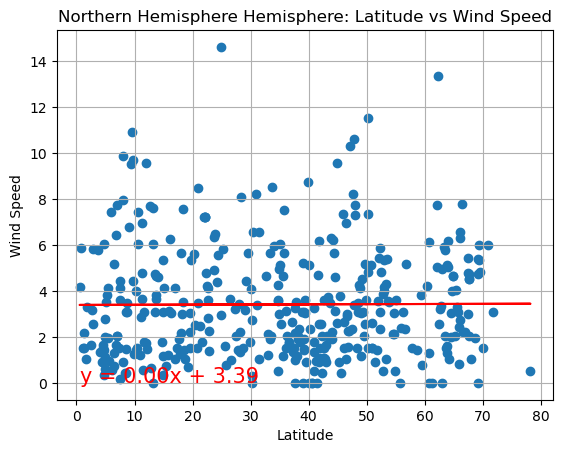

The r-squared is: 0.000


In [21]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Create linear regression plot for Latitude vs. Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function defined earlier to plot the linear regression
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Latitude vs Wind Speed", "Northern Hemisphere")


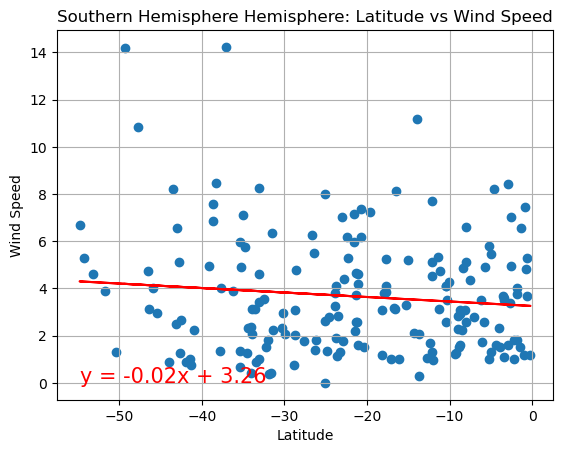

The r-squared is: 0.012


In [22]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Create linear regression plot for Latitude vs. Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function defined earlier to plot the linear regression
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Latitude vs Wind Speed", "Southern Hemisphere")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

For the Northern Hemisphere, the linear regression between Latitude vs. Wind Speed shows a very weak negative correlation with a slope of -0.0 and an R-squared value of 0.0017, indicating almost no relationship between latitude and wind speed. Only 0.17% of the variation in wind speed is explained by latitude, suggesting other factors are more influential.

For the Southern Hemisphere, the relationship is also weak, with a slope of -0.05 and an R-squared value of 0.065, indicating a slightly stronger, but still minimal, negative correlation. Only 6.5% of the variation in wind speed is explained by latitude, suggesting that latitude has a minor influence on wind speed in the Southern Hemisphere.

Both hemispheres demonstrate little to no meaningful correlation between latitude and wind speed.